#Import necessary libraries

In [78]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

**Step 1: Data Acquisition**

- Begin by obtaining historical stock price data for the target companies and a dataset that includes the date, 25 news headlines for each company, and a binary label indicating stock price movement (1 for up, 0 for no change or down).

- Load the dataset into a Pandas DataFrame.

In [79]:
df=pd.read_csv('Data.csv', encoding = "ISO-8859-1")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


**Step 2: Exploratory Data Analysis**

- Preprocess the dataset, including cleaning and formatting. Ensure that date columns are in datetime format and that the text data is free of any inconsistencies.

- Perform EDA to get more insights into your dataset

#Exploratory Data Analysis

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

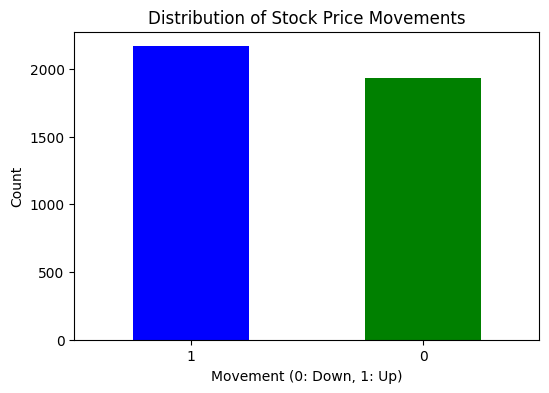

In [81]:
# Distribution of Stock Price Movements
plt.figure(figsize=(6, 4))
df['Label'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Stock Price Movements')
plt.xlabel('Movement (0: Down, 1: Up)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

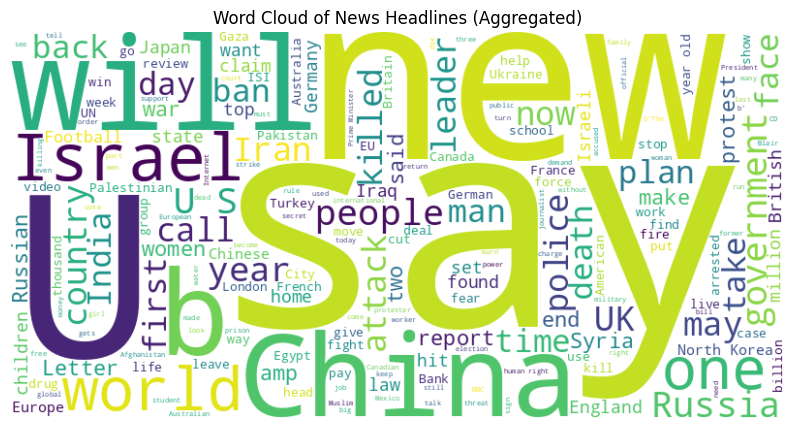

In [82]:
# Text Analysis
# Example: Create a word cloud for all the aggregated headlines for all companies
headline_columns = ['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25']
all_headlines = df[headline_columns].apply(lambda x: ' '.join(x.astype(str)), axis=1)
headlines_text = ' '.join(all_headlines)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(headlines_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of News Headlines (Aggregated)')
plt.axis('off')
plt.show()

#Data Pre-processing
**Step 3: Text Preprocessing**

- For each set of news headlines related to a company, you may perform text preprocessing. This can include tokenization, removal of stopwords, and other text cleaning steps.

In [83]:
#Train-test split
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [84]:
# Removing punctuations
data = train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1 = [i for i in range(25)]
new_Index = [str(i) for i in list1]
data.columns = new_Index

# Convertng headlines to lower case
for index in new_Index:
    data[index] = data[index].str.lower()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite
2,coventry caught on counter by flo,united s rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,...,south melbourne australia,necaxa mexico,real madrid spain,raja casablanca morocco,corinthians brazil,tony s pet project,al nassr saudi arabia,ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,auntie back in fashion even if the dress look...,shoaib appeal goes to the top,hussain hurt by shambles but lays blame on e...,england s decade of disasters,revenge is sweet for jubilant cronje,...,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for,christmas glitches,upending a table chopping a line and scoring ...,scientific evidence unreliable defence claims,fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake up of failing nhs,lessons of law s hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers are you all whingers,hollywood beyond,ashes and diamonds,whingers a formidable minority,alan parker part two,thuggery toxins and ties,...,most everywhere udis,most wanted chloe lunettes,return of the cane completely off the agenda,from sleepy hollow to greeneland,blunkett outlines vision for over s,embattled dobson attacks play now pay later ...,doom and the dome,what is the north south divide,aitken released from jail,gone aloft


In [85]:
#Join all headlines for a single company into a single paragraph
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [86]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [87]:
train['News_Headlines'] = headlines

<ipython-input-87-374d496357f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['News_Headlines'] = headlines


<ipython-input-88-e7628ff5e42a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Headline_Length'] = train['News_Headlines'].apply(lambda x: len(x.split()))


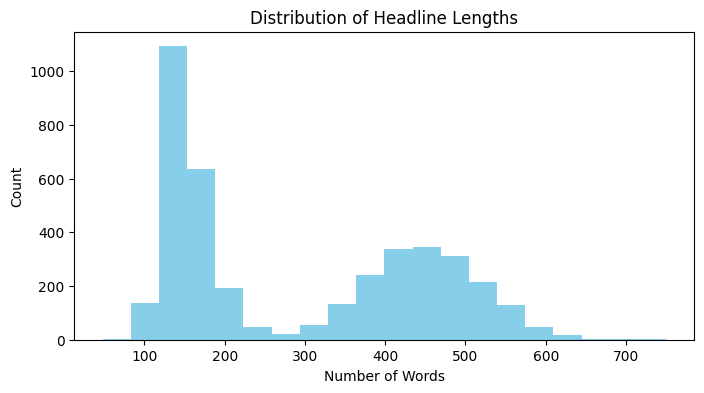

In [88]:
# Distribution of headline lengths
train['Headline_Length'] = train['News_Headlines'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 4))
plt.hist(train['Headline_Length'], bins=20, color='skyblue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

In [89]:
# 8. Outlier Detection (optional)
# Example: Detect outliers in headline length
q1 = train['Headline_Length'].quantile(0.25)
q3 = train['Headline_Length'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = train[(train['Headline_Length'] < lower_bound) | (train['Headline_Length'] > upper_bound)]
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 0


#Implementing Bag-of-Words model
**Step 4: Feature Extraction (Bag of Words Model)**

- Utilize the Bag of Words (BoW) model to convert the processed text data into a numerical format that machine learning algorithms can understand.

- Create a BoW representation for each set of news headlines for each date. This involves creating a vocabulary of unique words from all headlines and representing each document as a vector of word counts.

In [90]:
countvector = CountVectorizer(ngram_range=(1,2))
traindataset = countvector.fit_transform(headlines)

#Splitting dataset into train and test sets
**Step 5: Target Variable**

- The binary label indicating stock price movement serves as your target variable. This label will be used to train and evaluate the Random Forest classifier.

**Step 6: Data Splitting**

- Split the dataset into training and testing sets. Allocate a portion of the data for training (e.g., 80%) and the remaining portion for testing (e.g., 20%).

In [91]:
print(len(train))
print(len(test))

3975
378


#Implementing RandomForest Classifier to predict sentiment
**Step 7: Building Random Forest Model**

- Define and create a Random Forest classifier. Random Forest is a suitable choice for binary classification tasks.

- Configure hyperparameters such as the number of trees in the forest, tree depth, and other relevant parameters using Hyper-parameter tuning.

**Step 8: Model Training**

- Train the Random Forest classifier using the training dataset, which consists of BoW representations of news headlines and corresponding binary labels (stock price movement).

In [92]:
randomclassifier = RandomForestClassifier(n_estimators=400, criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=400)

#Predicting using the Test Dataset
**Step 9: Prediction**

- Use the trained Random Forest model to make predictions on new, unseen data. Provide the BoW representation of news headlines for a given date.

In [93]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

#Model results
**Step 10: Model Evaluation**

- Evaluate the model's performance on the testing dataset to assess its ability to classify whether the stock price will go up or not.

- Use evaluation metrics such as accuracy, precision, recall, F1-score, and the confusion matrix to assess the model's performance.

In [94]:
#Print results
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[138  48]
 [  7 185]]
0.8544973544973545
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       186
           1       0.79      0.96      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378



**Step 11: Result Interpretation**

- Interpret the model's predictions for trading decisions. For example, if the model predicts a high likelihood of the stock price going up, it may suggest a buy signal, and vice versa.